## 1:

In [1]:
from qiskit import *
from qiskit.visualization import *

qc = QuantumCircuit()
qr = QuantumRegister(3,'q')
cr = ClassicalRegister(3,'creg')

qc.add_register(qr)
qc.add_register(cr)

qc.x(0)
qc.h(1)
qc.cnot(1,2)
qc.cnot(0,1)
qc.h(0)
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)

qc.x(2).c_if(1, 1)
qc.z(2).c_if(0, 1)

qc.measure(2,2)

qc.draw()

CircuitError: 'Index 3 out of range for size 3.'

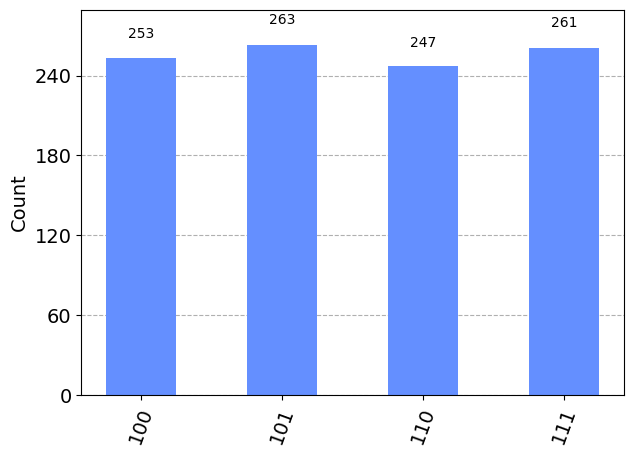

In [37]:
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc, shots = 1024)
hist = job.result().get_counts()
plot_histogram(hist)

As you can see, all of the possible results have a 1 measured in q_2, meaning we've teleported the 1 from q_0 to q_2.

## 2:

In [38]:
from qiskit import *
from qiskit.visualization import *

qc = QuantumCircuit()
qr = QuantumRegister(3,'q')
cr = ClassicalRegister(3,'creg')

qc.add_register(qr)
qc.add_register(cr)

qc.h(0)
qc.h(1)
qc.cnot(1,2)
qc.cnot(0,1)
qc.h(0)
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)

qc.x(2).c_if(1, 1)
qc.z(2).c_if(0, 1)

qc.measure(2,2)

qc.draw()

┌───┐          ┌───┐ ░ ┌─┐                                  
   q_0: ┤ H ├───────■──┤ H ├─░─┤M├──────────────────────────────────
        ├───┤     ┌─┴─┐└───┘ ░ └╥┘┌─┐                               
   q_1: ┤ H ├──■──┤ X ├──────░──╫─┤M├───────────────────────────────
        └───┘┌─┴─┐└───┘      ░  ║ └╥┘    ┌───┐         ┌───┐     ┌─┐
   q_2: ─────┤ X ├───────────░──╫──╫─────┤ X ├─────────┤ Z ├─────┤M├
             └───┘           ░  ║  ║     └─╥─┘         └─╥─┘     └╥┘
                                ║  ║ ┌─────╨──────┐┌─────╨──────┐ ║ 
creg: 3/════════════════════════╩══╩═╡ creg_1=0x1 ╞╡ creg_0=0x1 ╞═╩═
                                0  1 └────────────┘└────────────┘ 2

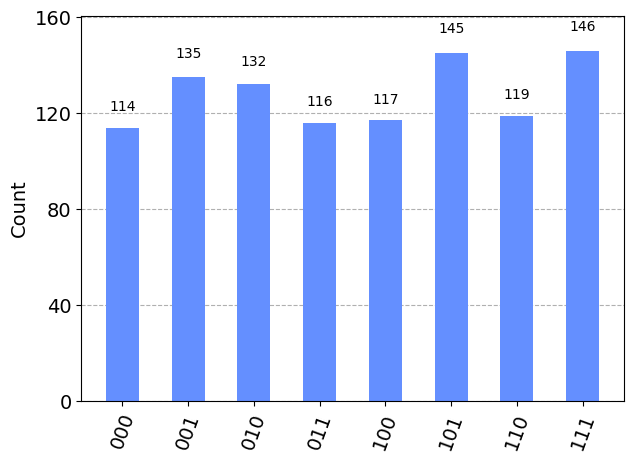

In [39]:
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc, shots = 1024)
hist = job.result().get_counts()
plot_histogram(hist)

Since, for |+>, there is a roughly 50/50 chance of measuring a classical 0 or a 1, and since q_0 and q_1 can end up as anything, you end up with all possible results of a 3 qubit system.  
  
    
    

## 3:

In [40]:
qc = QuantumCircuit()
qr = QuantumRegister(3,'q')
cr = ClassicalRegister(3,'creg')

qc.add_register(qr)
qc.add_register(cr)

qc.x(0)
qc.x(2)
qc.h(1)
qc.cnot(1,2)
qc.cnot(0,1)
qc.h(0)
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)

qc.x(2).c_if(1, 0)
qc.z(2).c_if(0, 1)

qc.measure(2,2)

qc.draw()

┌───┐          ┌───┐ ░ ┌─┐                                  
   q_0: ┤ X ├───────■──┤ H ├─░─┤M├──────────────────────────────────
        ├───┤     ┌─┴─┐└───┘ ░ └╥┘┌─┐                               
   q_1: ┤ H ├──■──┤ X ├──────░──╫─┤M├───────────────────────────────
        ├───┤┌─┴─┐└───┘      ░  ║ └╥┘    ┌───┐         ┌───┐     ┌─┐
   q_2: ┤ X ├┤ X ├───────────░──╫──╫─────┤ X ├─────────┤ Z ├─────┤M├
        └───┘└───┘           ░  ║  ║     └─╥─┘         └─╥─┘     └╥┘
                                ║  ║ ┌─────╨──────┐┌─────╨──────┐ ║ 
creg: 3/════════════════════════╩══╩═╡ creg_1=0x0 ╞╡ creg_0=0x1 ╞═╩═
                                0  1 └────────────┘└────────────┘ 2

You have to apply an X gate if c1 is a 0, and/or a Z gate if c0 is a 1.

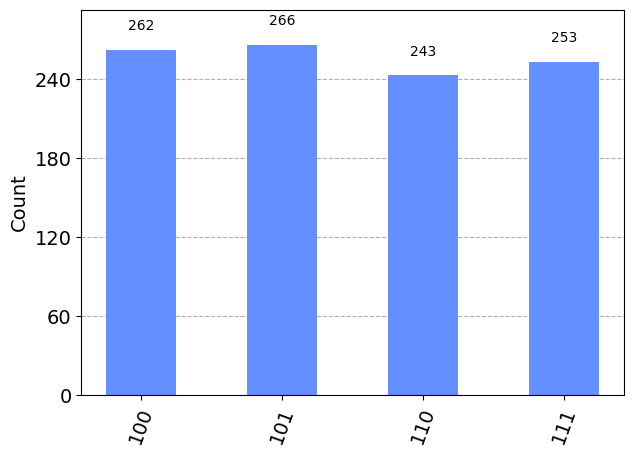

In [41]:
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc, shots = 1024)
hist = job.result().get_counts()
plot_histogram(hist)